In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train['Embarked'].fillna('S',inplace=True)


In [6]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
train['Age'].fillna(train['Age'].mean(), inplace=True) 


In [9]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
test['Age'].fillna(test['Age'].mean(), inplace=True) 


In [11]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
train[['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
train[['Sex','Survived']].groupby('Sex').mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
train[['Embarked','Survived']].groupby('Embarked').mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [16]:
train['Age'].mean()

np.float64(29.69911764705882)

<Axes: xlabel='Age', ylabel='Density'>

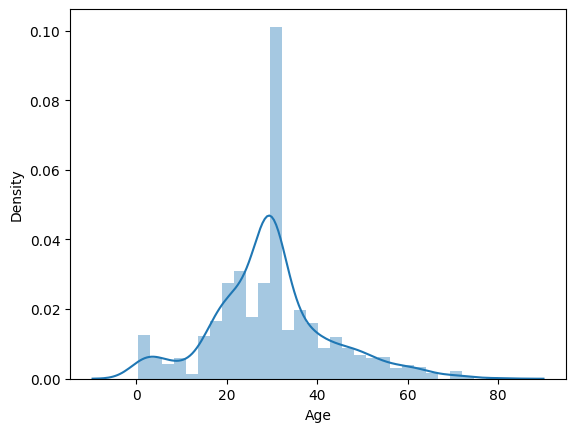

In [17]:
sns.distplot(train['Age'])

<Axes: ylabel='Age'>

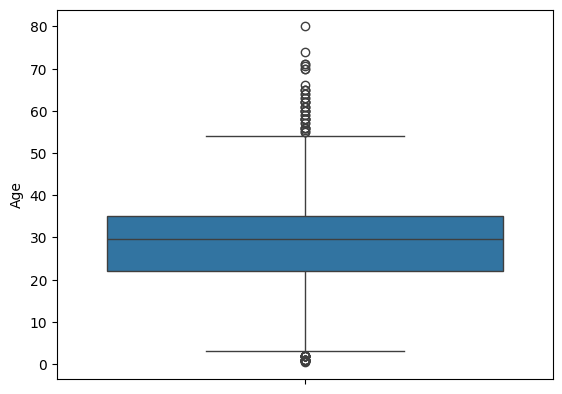

In [18]:
sns.boxplot(train['Age'])


In [19]:
PassengerId=test['PassengerId']

In [20]:
train.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)
test.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [21]:
train.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

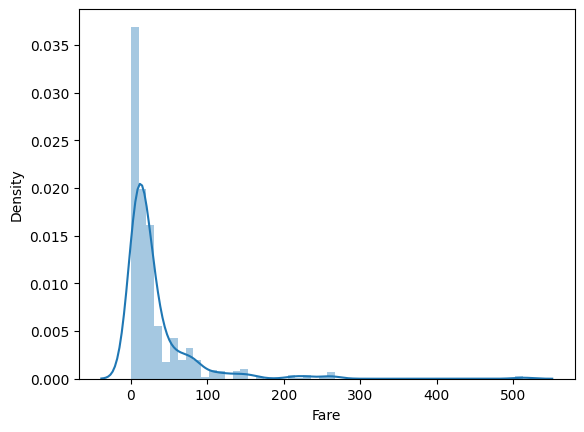

In [22]:
sns.distplot(train['Fare'])


In [23]:
train['Fare'].mean()

np.float64(32.204207968574636)

<Axes: ylabel='Fare'>

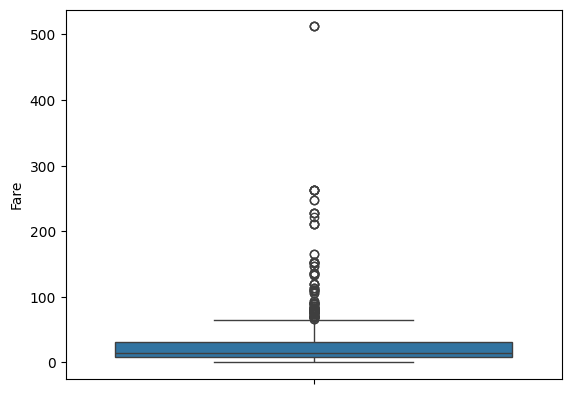

In [24]:
sns.boxplot(train['Fare'])


In [25]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [26]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [27]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [28]:
train['family'].value_counts()


family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [29]:
train[['family','Survived']].groupby('family').mean()


,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [30]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [31]:
train['family_size']=train['family'].apply(family_size)
test['family_size']=test['family'].apply(family_size)

In [32]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [33]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [34]:
train.drop(columns=['Survived'],inplace=True)


In [35]:
print(train.shape)
print(test.shape)

(891, 6)
(418, 6)


In [36]:
final=pd.concat([train,test],ignore_index=True)


In [37]:
final.shape


(1309, 6)

In [38]:
train['Sex'].isnull().sum()

np.int64(0)

In [39]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
final["Sex"] = final["Sex"].map({"male": 0, "female": 1}) 
final["Embarked"] = final["Embarked"].map({"S": 0, "C": 1,"Q":2}) 
final["family_size"] = final["family_size"].map({"Alone": 0, "Small": 1,"Large":2}) 


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    object 
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Embarked     891 non-null    object 
 5   family_size  891 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 41.9+ KB


In [41]:
train['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [42]:
sca=StandardScaler()
sca.fit_transform(train[['Fare']])

array([[-5.02445171e-01],
       [ 7.86845294e-01],
       [-4.88854258e-01],
       [ 4.20730236e-01],
       [-4.86337422e-01],
       [-4.78116429e-01],
       [ 3.95813561e-01],
       [-2.24083121e-01],
       [-4.24256141e-01],
       [-4.29555021e-02],
       [-3.12172378e-01],
       [-1.13845709e-01],
       [-4.86337422e-01],
       [-1.87093118e-02],
       [-4.90279793e-01],
       [-3.26266659e-01],
       [-6.19988892e-02],
       [-3.86670720e-01],
       [-2.85997284e-01],
       [-5.02948539e-01],
       [-1.24919787e-01],
       [-3.86670720e-01],
       [-4.86756223e-01],
       [ 6.63597416e-02],
       [-2.24083121e-01],
       [-1.64441595e-02],
       [-5.02948539e-01],
       [ 4.64700108e+00],
       [-4.89776426e-01],
       [-4.89442190e-01],
       [-9.02720170e-02],
       [ 2.30172882e+00],
       [-4.92377828e-01],
       [-4.37007438e-01],
       [ 1.00606170e+00],
       [ 3.98582080e-01],
       [-5.02863973e-01],
       [-4.86337422e-01],
       [-2.8

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    object 
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Embarked     891 non-null    object 
 5   family_size  891 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 41.9+ KB


In [44]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [45]:
Xf=final.tail(418).values
X=final.head(891).values
final.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [46]:
X.shape


(891, 6)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"],
}

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid=lr_params, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(X_train,y_train)
grid_lr=grid_search_lr.best_estimator_


In [50]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8],
    "min_samples_split": [2, 5, 10],
}

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
grid_rf=grid_search_rf.best_estimator_


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gra=GradientBoostingClassifier(loss='log_loss',n_estimators=50)
gra.fit(X_train,y_train)
y_pred=gra.predict(X_test)
x = cross_val_score(gra,X_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.83


In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [None,3, 5, 7],  
    'min_samples_split': [2, 5, 10],  
    'max_features': ['sqrt', 'log2', None],  
}


In [54]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator=gra,
                   param_grid=param_grid,
                  cv=3, n_jobs=-1)
model.fit(X_train,y_train)
x=model.best_score_
print(np.round(np.mean(x),2))
grid_gra=model.best_estimator_


0.83


In [55]:
estimators = [('gra',grid_gra),('rf',grid_rf),('log',grid_lr)]

In [56]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=estimators,voting='soft')
vc.fit(X_train, y_train)

x = cross_val_score(vc,X_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.83


In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
x=cross_val_score(xgb,X_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.79


In [62]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [64]:
grid=GridSearchCV(xgb,param_grid=params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
x=grid.best_score_
print(np.round(np.mean(x),2))

0.83


In [65]:
yf=vc.predict(Xf)
yf

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
submission=pd.DataFrame()


In [67]:
submission['PassengerId']=PassengerId
submission['Survived']=yf

In [68]:
submission.to_csv('submission1.csv', index=False)
